In [37]:
# Autoreload
%load_ext autoreload
%autoreload 2

from src.dataset import read_bidmc_dataset, split_dataset_by_age, split_dataset_by_gender, split_datasets_to_windows

dataset = read_bidmc_dataset()

age_datasets, age_names = split_dataset_by_age(dataset)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
print([len(x) for x in age_datasets])

[12, 6, 9, 15, 10]


In [39]:
windowed_datasets = split_datasets_to_windows(age_datasets, window_size=30, window_stride=30)

In [65]:
# We want a standardization followed by a butterworth filter for hr estimation
from src.filters import get_default_filter_for_metric

standardization_filter = get_default_filter_for_metric("standardize", "rr")
butterworth_filter = get_default_filter_for_metric("butterworth", "rr")

hr_filters = [standardization_filter, butterworth_filter]

In [66]:
from src.predictors import get_detector

hr_predictor = get_detector("peak", "rr")

In [67]:
from src.pipeline import Pipeline

In [68]:
hr_pipeline = Pipeline(hr_filters, hr_predictor)

In [71]:
for windowed_dataset, age_group in zip(windowed_datasets, age_names):
    print(age_group)    
    gts = []
    preds = []
    for window in windowed_dataset:
        gt_hr = window["rr"]
        pred_hr = hr_pipeline(window['ppg'])
        gts.append(gt_hr)
        preds.append(pred_hr)

    from metrics import metrics_table

    print(metrics_table(gts, preds))

Ages 0-50
+-------+-------+-------+
|  MAE  |  RMSE |  MAPE |
+-------+-------+-------+
| 1.613 | 2.846 | 8.726 |
+-------+-------+-------+
Ages 50-60
+-------+-------+-------+
|  MAE  |  RMSE |  MAPE |
+-------+-------+-------+
| 1.169 | 1.722 | 6.648 |
+-------+-------+-------+
Ages 60-70
+-------+-------+-------+
|  MAE  |  RMSE |  MAPE |
+-------+-------+-------+
| 1.226 | 1.787 | 6.726 |
+-------+-------+-------+
Ages 70-80
+-------+-------+-------+
|  MAE  |  RMSE |  MAPE |
+-------+-------+-------+
| 1.851 | 3.144 | 10.504|
+-------+-------+-------+
Ages 80-100
+-------+-------+-------+
|  MAE  |  RMSE |  MAPE |
+-------+-------+-------+
| 1.686 | 2.493 | 9.234 |
+-------+-------+-------+


array([-68.662002  , -68.55578121, -70.10937672, -73.41571299,
       -70.20898371, -69.98742731, -69.99311741, -69.78405398,
       -70.47298151, -70.79888228, -70.44489947, -70.72356866,
       -70.49253951, -71.51644737, -68.85982437, -69.64288852,
       -67.38840821, -66.02299601, -63.29829364, -57.52941176,
       -63.29727891, -61.67195839, -60.29590186, -58.88953393,
       -60.02620809, -62.28776509, -62.50289855, -67.104662  ,
       -61.91680232, -61.42941176, -58.61082559, -82.72049336,
       -81.39453581, -73.77042087, -74.70988404, -79.30434117,
       -74.46022099, -74.92515689, -76.91751963, -79.55414607,
       -78.89739555, -83.34473258, -82.99264305, -79.68997217,
       -82.34789483, -81.61169717, -81.71034483, -76.38768411,
       -72.75848559, -82.82760033, -73.78466886, -75.19182356,
       -78.90628282, -73.54525466, -73.02880681, -70.24429224,
       -78.50392958, -74.72700559, -78.2986755 , -80.76989943,
       -69.84655031, -74.07196785, -77.19899212, -58.11

In [52]:
from matplotlib import pyplot as plt


(array([ 1.,  2.,  1.,  3.,  0.,  0.,  1.,  1.,  0.,  2.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  3.,  4.,  0.,  4.,
         1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  4.,  1.,  8.,
        12., 43., 69.,  7.,  6.,  1.,  2.,  1.,  1.]),
 array([-8.35528986e+01, -8.26551492e+01, -8.17573998e+01, -8.08596504e+01,
        -7.99619010e+01, -7.90641517e+01, -7.81664023e+01, -7.72686529e+01,
        -7.63709035e+01, -7.54731542e+01, -7.45754048e+01, -7.36776554e+01,
        -7.27799060e+01, -7.18821567e+01, -7.09844073e+01, -7.00866579e+01,
        -6.91889085e+01, -6.82911592e+01, -6.73934098e+01, -6.64956604e+01,
        -6.55979110e+01, -6.47001617e+01, -6.38024123e

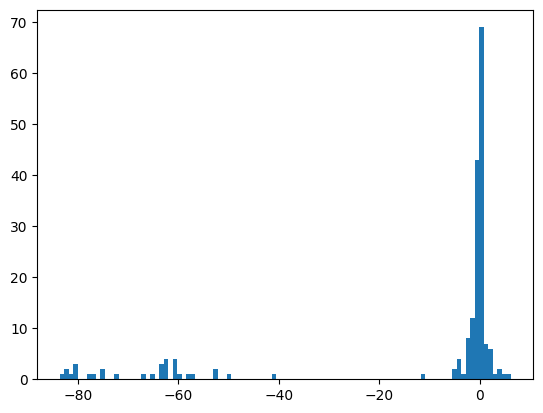

In [53]:
plt.hist(diffs, bins=100)